In [6]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

In [7]:
# Load the regression data set and take a quick look at it
regression_data = pd.read_csv("regression.csv", sep=",")
regression_data2 = pd.read_csv("regression.csv", sep=",")
regression_data2 = regression_data.values
# print(regression_data2.type())
regression_data.head()
# print(regression_data2)



,x1,x2,y
0,4.286896,3.103671,10.130192
1,4.009460,3.257794,9.677757
2,3.745839,0.815045,7.934881
3,3.804023,7.750934,11.756369
4,4.281540,9.607359,13.565895


In [8]:
#check and eliminating NaN
regression_data.isnull().values.any()
#Returned false, there is no NaN

False

In [9]:
X = regression_data[["x1","x2"]]
X=X.values
# X.head()
print(type(X))
Y = regression_data[["y"]]
Y=Y.values
# Y.head()

<class 'numpy.ndarray'>


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# lm.intercept_


In [46]:
#check the accuracy of the offline model
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()
MSE_score = np.array([])
for train_i, test_i in cv.split(X):
    X_train, X_test = X[train_i], X[test_i]
    Y_train, Y_test = Y[train_i], Y[test_i]
    lm = LinearRegression()
    lm.fit(X_train,Y_train)
# lm.coef_
    y_pred = lm.predict(X_test)
    MSE_score = np.append(MSE_score, mean_squared_error(Y_test, y_pred))
avg = np.mean(MSE_score)
sd = np.std(MSE_score)
print(avg, sd)
print(MSE_score )

0.02194103833033502 0.02152672264790083
[6.31329693e-02 5.26770308e-02 4.55741073e-02 2.77176876e-04
 1.02545500e-02 2.33247778e-02 6.43490085e-04 1.23819639e-02
 2.73836134e-02 1.65942777e-03 1.65147295e-04 5.10532439e-03
 2.07575615e-03 6.61985679e-04 1.39307055e-04 3.11451557e-02
 3.59706243e-02 8.45787088e-02 4.52687568e-02 4.00441870e-03
 2.17661831e-04 8.10584483e-05 1.19925117e-03 3.81156336e-02
 1.54332898e-04 1.96159715e-02 4.28474020e-02 3.06770870e-03
 3.00772849e-02 9.50413556e-03 2.91412680e-02 3.29406302e-02
 5.57204613e-02 4.50244226e-03 5.36080877e-05 3.74794875e-02
 1.49797260e-02 1.61331274e-02 3.09220715e-02 3.15227470e-02
 3.51275587e-02 2.22813328e-04 2.04247034e-03 1.81213014e-02
 2.91065267e-02 1.42016575e-02 2.36506805e-02 2.48571263e-02
 6.12482811e-02 1.79907255e-02 3.61574298e-02 2.17616287e-02
 5.19268064e-03 1.73799704e-02 4.36088456e-03 3.05557823e-02
 1.09384546e-01 2.19474076e-03 2.35907603e-03 1.32818953e-02
 2.04039157e-03 2.36808712e-03 4.58564302e-03

In [12]:
######Trying something for data
arr1 = [[1,2,3,4]]
arr2 = [[5,6,7,8]]
arr3 = np.concatenate((arr1, arr2))
print(arr3)
arr4 = [[]]
for i in range(4):
    arr4[0].append(i)
print(arr4)
    

[[1 2 3 4]
 [5 6 7 8]]
[[0, 1, 2, 3]]


In [43]:
#split the data for online training with 50 points, and used LOOCV
import random
cv = LeaveOneOut()

# result_50 = np.array([])

MSE_overall = np.ndarray(shape = (10, 6), dtype = float)
# MSE_score = np.array([])
for i in range(10):
    random.seed(i)
    # shuffle data for 10 time
#!!!!Don't delete frac = 1
### For information about frac = 1, see this website: https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
    shuffeled_data =regression_data.sample(frac=1).reset_index(drop = True)
#     shuffeled_data = shuffeled_data.values
#!!!!After shuffle, it is still a dataframe

####### for check data type
#     print(shuffeled_data.type())
#     print(shuffeled_data.shape)
######## split the pandas dataframe and put them into a list, so I am dealing with a list of dataframes
    last_check = 0
    splited_data = []
    for idx in [50,60,70,80,90,100]:
        splited_data.append(shuffeled_data.loc[last_check:idx-1])

#         print(splited_data)
        last_check=idx
#     print(splited_data[5], i)
# This is checking that I got the correct result

########Old code for shuffle, and spliting X and Y, No longer needed #################
#     shuffeled_data = np.array_split(regression_data, [50,60,70,80,90,99])
#     print(shuffeled_data.type(),shuffeled_data)
#     shuffeled_X = shuffeled_data[:,0:2]
#     shuffeled_X_split = np.array_split(shuffeled_X, [50,60,70,80,90,99])
#     shuffeled_Y = shuffeled_data[:,2:]
#     shuffeled_Y_split = np.array_split(shuffeled_Y, [50,60,70,80,90,99])
#     print(shuffeled_X_split,shuffeled_Y_split)
####################################################################################

# #     MSE_score = np.array([])
##################Old way of spliting dataset, no longer needed##################
# #     X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
# # test_size=0.5, random_state=i)
# #     X_shuffeled_train = shuffeled_data[0].values
# #     print(X_shuffeled_train.type())
####################################################################################
    



######## After got a list of dataframe (splited_data）, First train and validata the 50 with LOOCV !!

## i defined the number of the dataset, j define the round number


    for j in range(6):
        MSE_score = np.array([])
#         MSE_score = 0.0
        ##check data type and make sure they are array now
#         print(shuffeled_Y50.type())
##since the initial round used a different validation step, do a if condition
        if j == 0:
            
            shuffeled_X = splited_data[j][["x1","x2"]].values
            shuffeled_Y = splited_data[j][["y"]].values
            for train_i, test_i in cv.split(shuffeled_X):
                X_trainLO, X_testLO = shuffeled_X[train_i], shuffeled_X[test_i]
                Y_trainLO, Y_testLO = shuffeled_Y[train_i], shuffeled_Y[test_i]
                lm = LinearRegression()
                lm.fit(X_trainLO,Y_trainLO)
#         print(X_testLO.shape)
                y_pred = lm.predict(X_testLO)
#                 MSE_score = np.array([])
#         print(y_pred.shape)
#                 MSE_score = mean_squared_error(Y_test, y_pred)
#                 print(MSE_score )
                MSE_score = np.append(MSE_score, mean_squared_error(Y_testLO, y_pred))
    
#                 print(MSE_score)
#                 print(Y_testLO,'Y_testLO')
            MSE_overall[i,j]=np.mean(MSE_score)
#             MSE_overall_std[i,j]= np.std(MSE_score)
            
#         generate the mse for 50 data points, and store in specific array
        else:
#             print("j", j)
            additional_X = splited_data[j][["x1","x2"]].values
            additional_Y = splited_data[j][["y"]].values
#             print(additional_Y, "additional_Y")
            y_pred = lm.predict(additional_X)
#             print(y_pred, "y_pred")
            MSE_score = np.append(MSE_score, mean_squared_error(additional_Y, y_pred))
            MSE_score = mean_squared_error(additional_Y, y_pred)
#             print(MSE_score, j)
            shuffeled_X = np.concatenate((shuffeled_X, additional_X))
            shuffeled_Y = np.concatenate((shuffeled_Y, additional_Y))
            lm.fit(shuffeled_X,shuffeled_Y)
        MSE_overall[i,j] = np.mean(MSE_score)
#         MSE_overall_average[i,j]=np.mean(MSE_score)
#         MSE_overall_std[i,j]= np.std(MSE_score)
      

    ######### Now, inside a for loop, do  fit (performance of the pevious model)
    # and then train the model
# print(MSE_overall, MSE_overall.shape)
        
        

In [48]:
MSE_mean = MSE_overall.mean(axis = 0)
MSE_mean = np.append(MSE_mean,0.02194103833033502)
print(MSE_mean)

[0.02276048 0.02289226 0.02224012 0.02202071 0.02234011 0.02139678
 0.02194104]


In [53]:
MSE_std = MSE_overall.std(axis = 0)
MSE_std = np.append(MSE_std,0)
print(MSE_std)

[0.00150607 0.0059959  0.00505275 0.00606408 0.00478673 0.00415347
 0.        ]


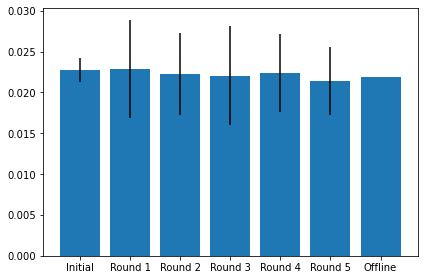

In [54]:
import matplotlib.pyplot as plt
x = ['Initial', 'Round 1','Round 2','Round 3','Round 4','Round 5','Offline']
fig,ax = plt.subplots()
ax.bar(x,MSE_mean, yerr = MSE_std, align = 'center')
ax.set_xticks(x)
plt.tight_layout()
# plt.plot(x,MSE_mean)
plt.show()